# Ch 3 Linear Regression - Applied Problems

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML
sns.set(style="white")
plt.style.use('seaborn-white')

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
!pip install -q ISLP

  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [30]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize , poly)

In [3]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Problem 8

In [18]:
# Fix datatypes for horsepower
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()

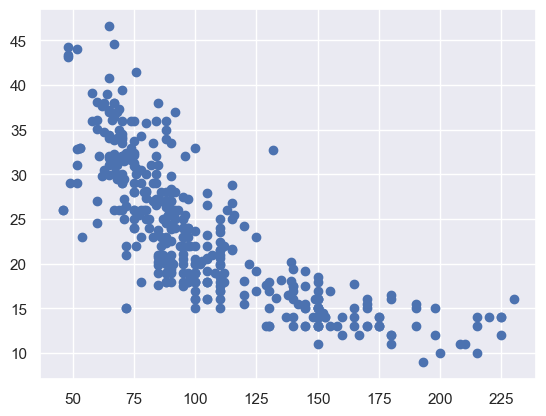

In [41]:
X = auto['horsepower']
y = auto['mpg']
plt.scatter(X, y)

In [55]:
df = pd.DataFrame(data={'horsepower': X, 'mpg': y})
model = smf.ols(formula="mpg ~ horsepower", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        14:50:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

i. Yes, there is a relationship given high |t| and high F and low p

ii. Decently strong relationship with r^2 = 0.606

iii. Negative relationship given -0.1578

iv. See below


In [44]:
test = pd.DataFrame({'horsepower': [98]})
pred = results.get_prediction(test)
print(f'''Model predicts for hp=98 that\n
      mpg = {pred.predicted_mean}\n
      confidence interval = {pred.conf_int(alpha=0.05)}\n 
      prediction interval = {pred.conf_int(obs=True, alpha=0.5)}
''')

Model predicts for hp=98 that

      mpg = [24.46707715]

      confidence interval = [[23.97307896 24.96107534]]
 
      prediction interval = [[21.15076455 27.78338976]]



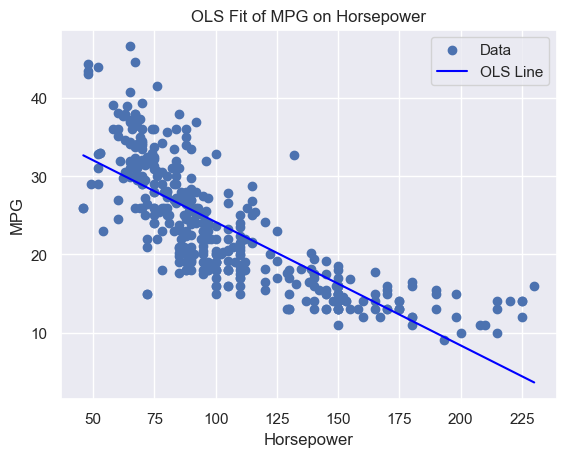

In [51]:
# (b) Plot data with fit on top
xs = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
ys = results.params['Intercept'] + results.params['horsepower']*xs
plt.scatter(X, y, label='Data')
plt.plot(xs, ys, color='blue', label="OLS Line")
plt.legend()
plt.title("OLS Fit of MPG on Horsepower")
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

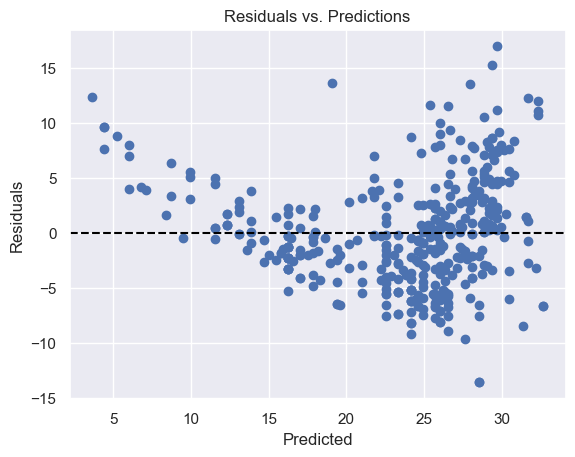

In [67]:
# (c) diagnostic plots
residuals = results.resid
preds = results.fittedvalues
plt.scatter(preds, residuals, label='residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.show()

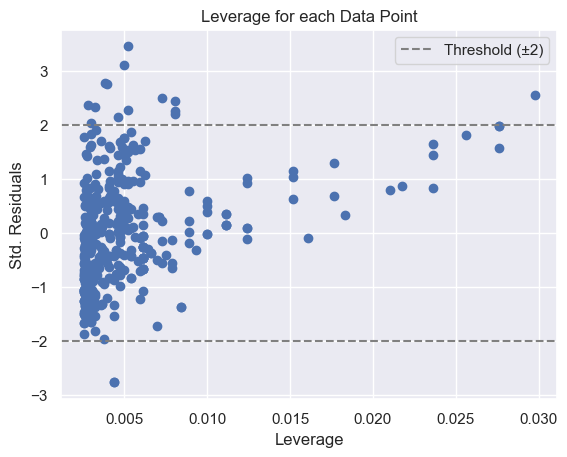

In [79]:
influences = results.get_influence()
leverages = influences.hat_matrix_diag
std_residuals = influences.resid_studentized_internal
cooks_d = influences.cooks_distance[0]

big_lev_x = np.argmax(influences.hat_matrix_diag)
big_lev_y = ys[big_lev_x]

plt.scatter(leverages,std_residuals)
# Add thresholds for standardized residuals (e.g., |2| or |3| are common cutoffs)
plt.axhline(y=2, color='gray', linestyle='--', label='Threshold (±2)')
plt.axhline(y=-2, color='gray', linestyle='--')

# Plot Cook's distance
#plt.stem(np.arange(len(cooks_d)), cooks_d, linefmt='b-', markerfmt='bo', basefmt='r-')
#plt.axhline(y=4/len(cooks_d), color='red', linestyle='--', label='Threshold (4/n)')

plt.title('Leverage for each Data Point')
plt.xlabel('Leverage')
plt.ylabel("Std. Residuals")
plt.legend()
plt.show()

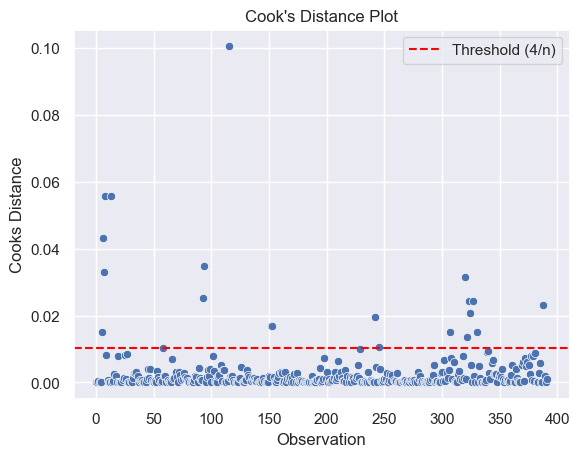

In [80]:
# Create DataFrame for plotting
diag_df = pd.DataFrame({'Observation': np.arange(len(cooks_d)), 'Cooks Distance': cooks_d})

# Scatter plot with Seaborn
sns.scatterplot(x='Observation', y='Cooks Distance', data=diag_df)
plt.axhline(y=4/len(cooks_d), color='red', linestyle='--', label='Threshold (4/n)')
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

## Problem 9

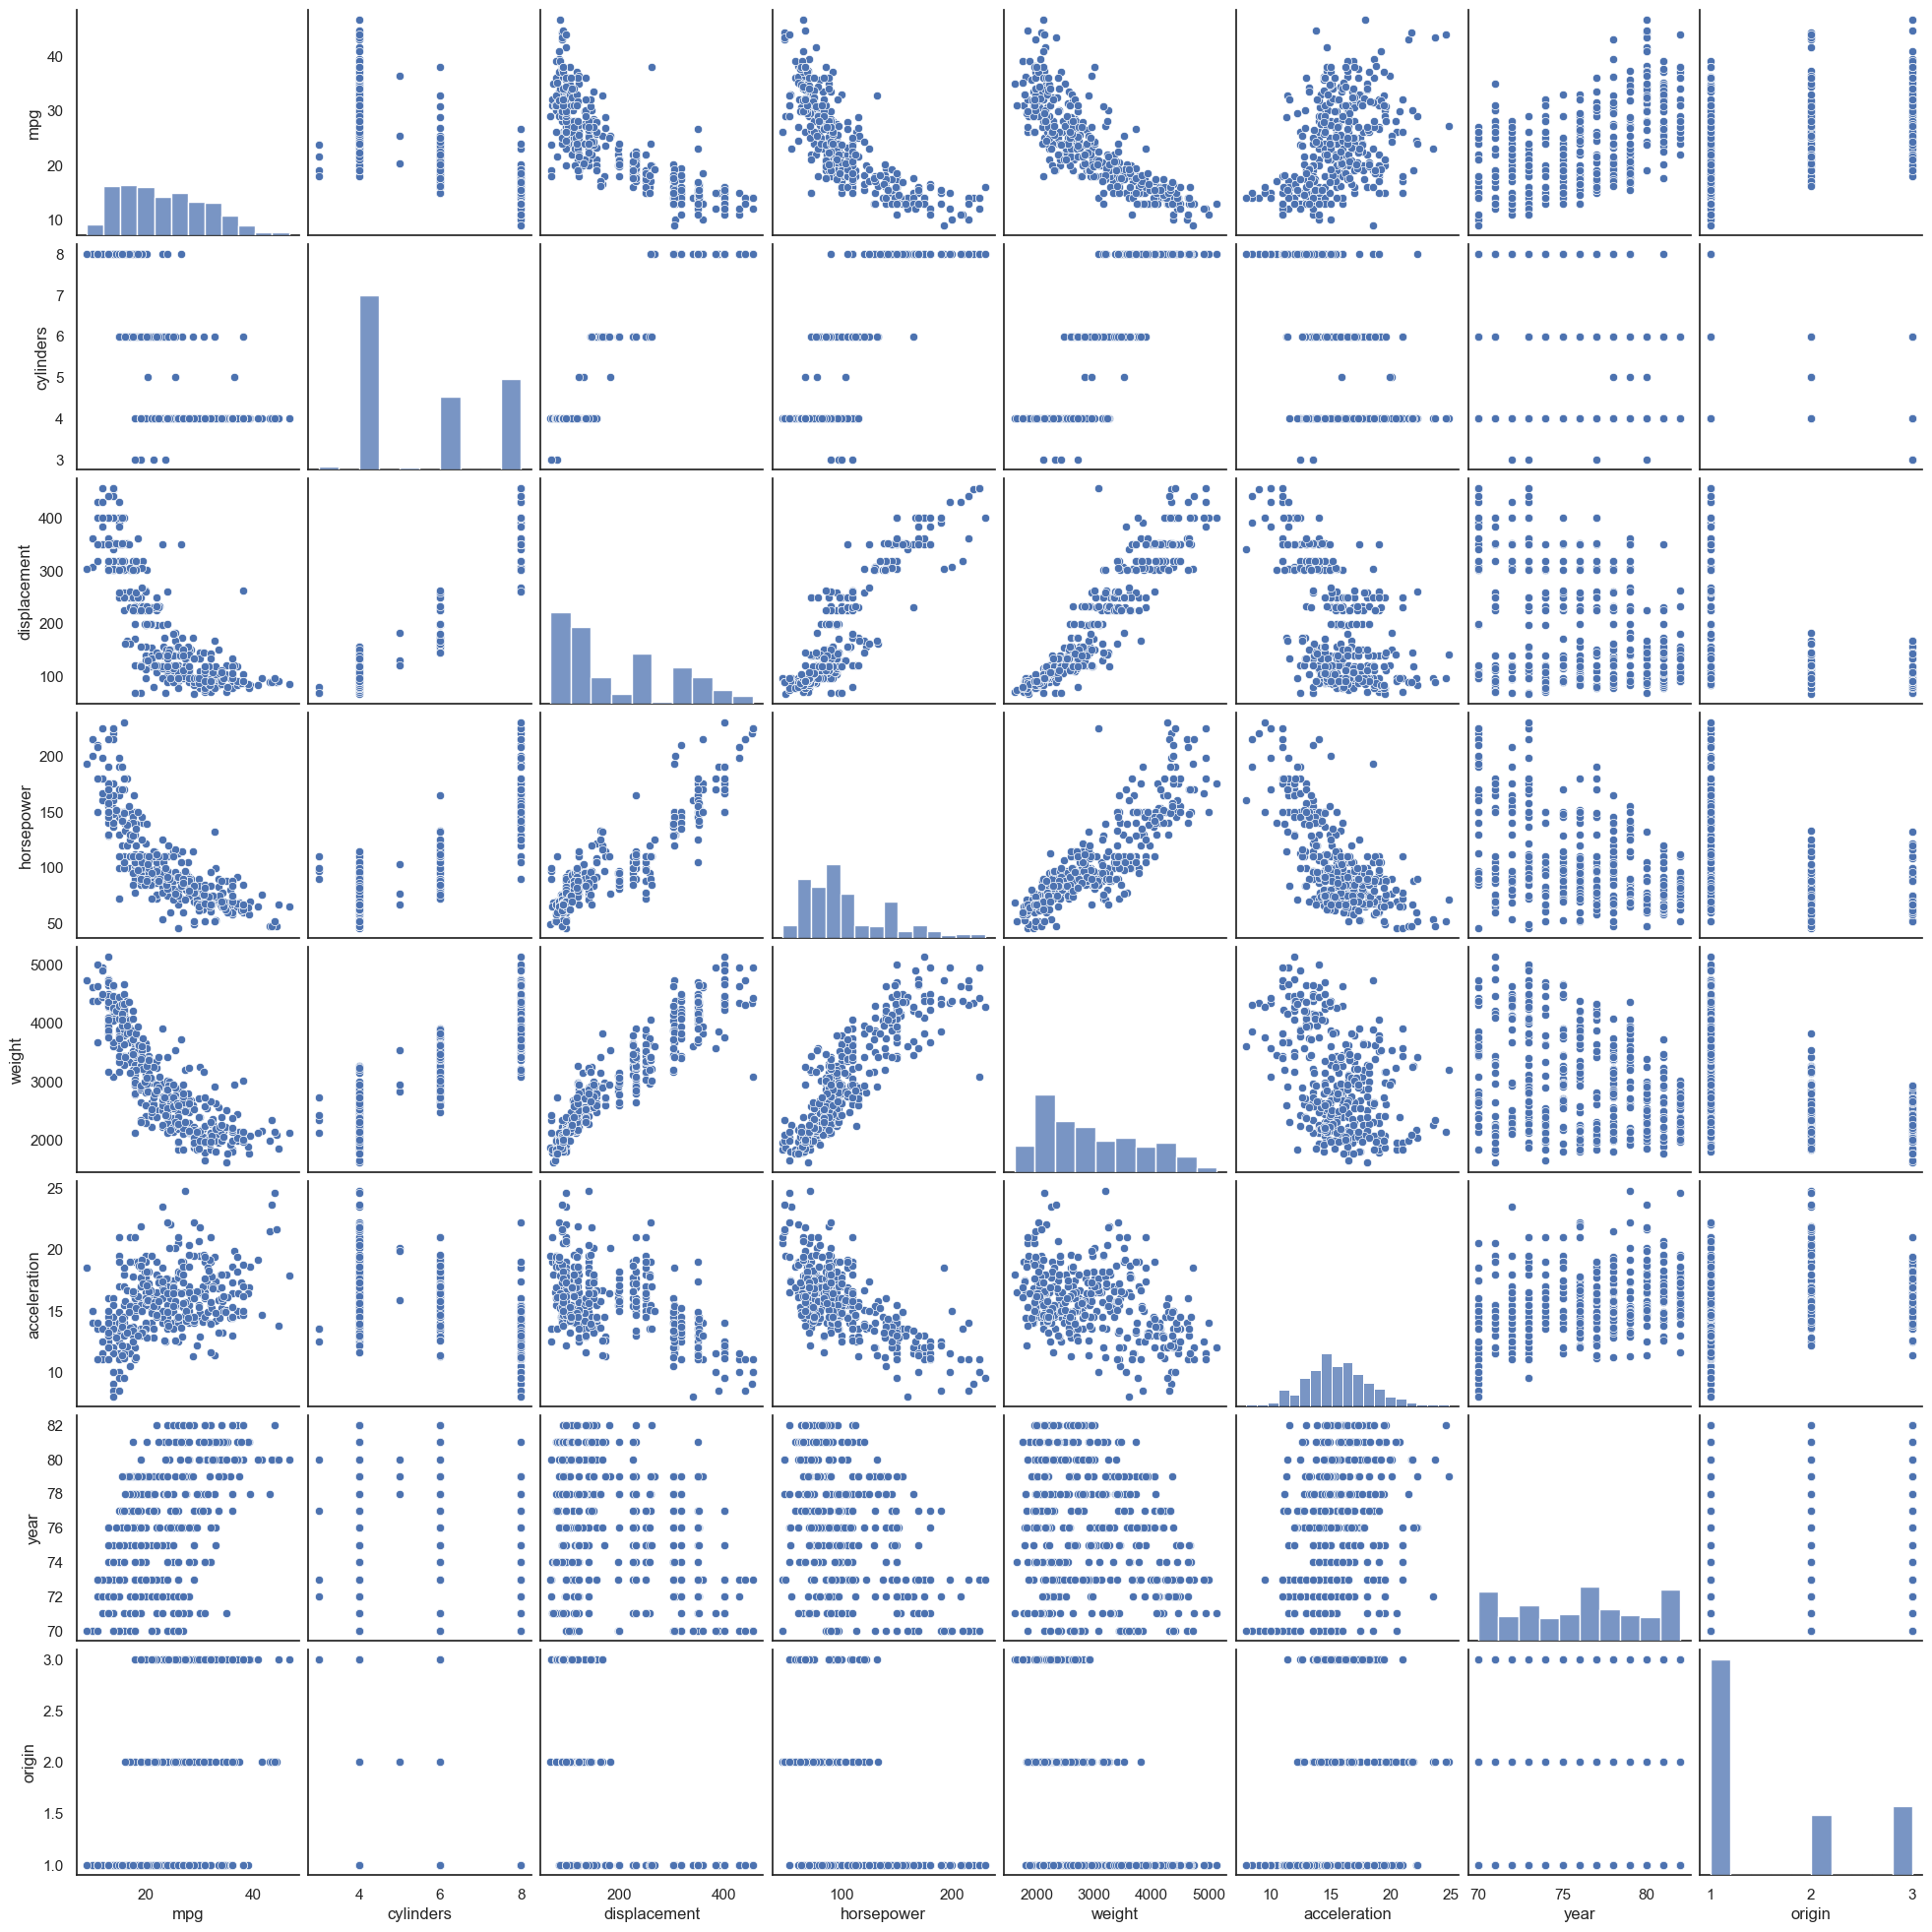

In [ ]:
# (a) Plot features
sns.pairplot(auto)

In [85]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

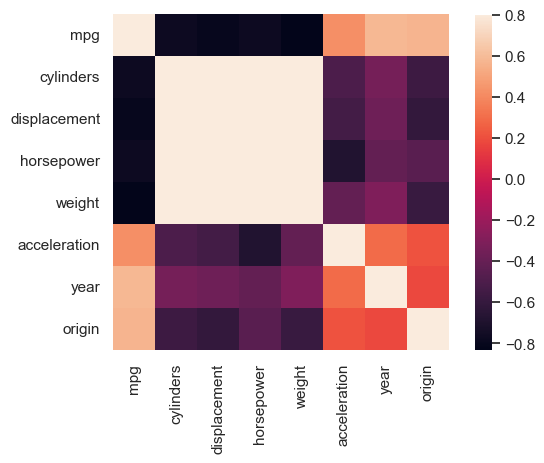

In [87]:
# (b) correlation map
corr = auto.drop(columns=['name']).corr()
sns.heatmap(corr, vmax=0.8, square=True)
plt.tight_layout()
plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [90]:
model = smf.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        20:27:12   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

i. Yes, there's a relationship. THe F-stat is large with tiny p value. Meaning that at least one of the coefficients is likely to be non-zero.

ii. Displacement, weight, year, and origin appear to have significant relationship with MPG.

iii. The year coefficient 0.75 means if you hold all other things constant and increase year by 1, the mpg goes up by 0.75

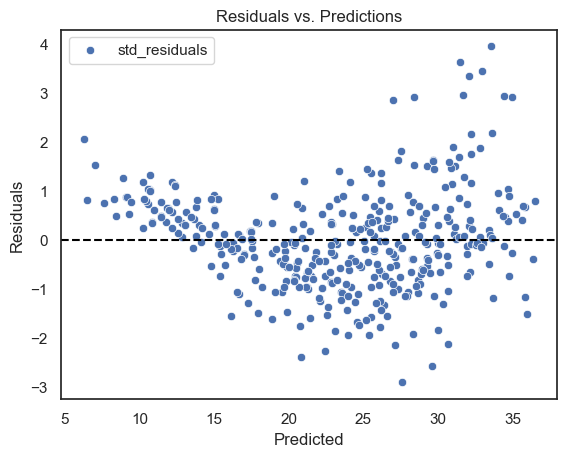

In [94]:
# (d) Plots and Diagnostics
influences = results.get_influence()
leverages = influences.hat_matrix_diag
std_residuals = influences.resid_studentized_internal
cooks_d = influences.cooks_distance[0]
residuals = results.resid
preds = results.fittedvalues

sns.scatterplot(x=preds, y=std_residuals, label='std_residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.show()

/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


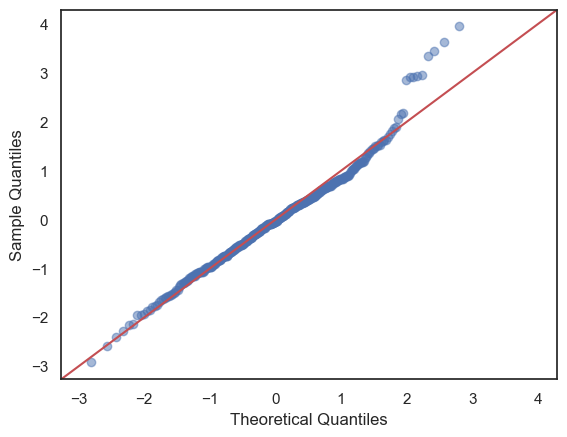

In [93]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(std_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

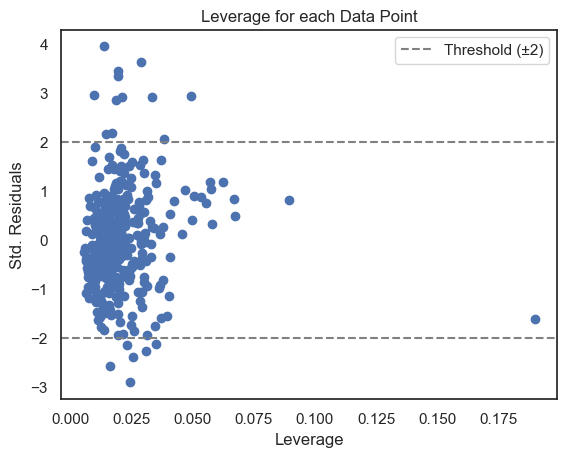

In [95]:
plt.scatter(leverages,std_residuals)
# Add thresholds for standardized residuals (e.g., |2| or |3| are common cutoffs)
plt.axhline(y=2, color='gray', linestyle='--', label='Threshold (±2)')
plt.axhline(y=-2, color='gray', linestyle='--')

# Plot Cook's distance
#plt.stem(np.arange(len(cooks_d)), cooks_d, linefmt='b-', markerfmt='bo', basefmt='r-')
#plt.axhline(y=4/len(cooks_d), color='red', linestyle='--', label='Threshold (4/n)')

plt.title('Leverage for each Data Point')
plt.xlabel('Leverage')
plt.ylabel("Std. Residuals")
plt.legend()

plt.show()

In [96]:
model = smf.ols(formula='mpg ~ horsepower*year + displacement + weight + origin', data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          7.51e-156
Time:                        20:58:53   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -

In [97]:
model = smf.ols(formula='mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year', data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          1.09e-162
Time:                        21:05:08   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

- horsepower x year, displacement x origin, horsepower x origin each seem to matter

In [100]:
model_string = 'mpg ~ horsepower + np.sqrt(horsepower) + weight + year + origin'
model = smf.ols(formula=model_string, data=auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     454.1
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          3.42e-159
Time:                        21:15:42   Log-Likelihood:                -983.14
No. Observations:                 392   AIC:                             1978.
Df Residuals:                     386   BIC:                             2002.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.7314    

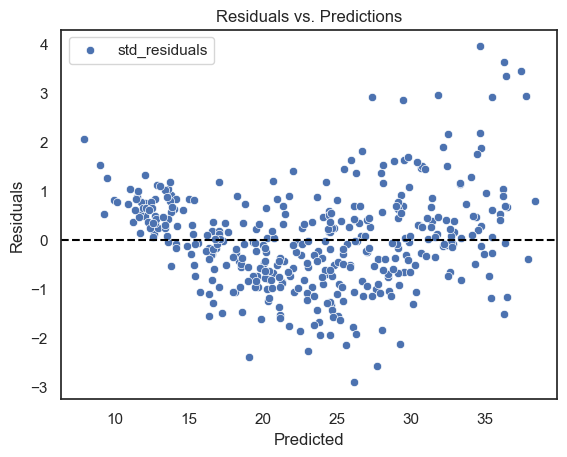

In [101]:
residuals = results.resid
preds = results.fittedvalues

sns.scatterplot(x=preds, y=std_residuals, label='std_residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.show()

## Problem 13 - Monte Carlo

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

In [ ]:
# (a)
x = np.random.normal(size=100)

<Axes: ylabel='Density'>

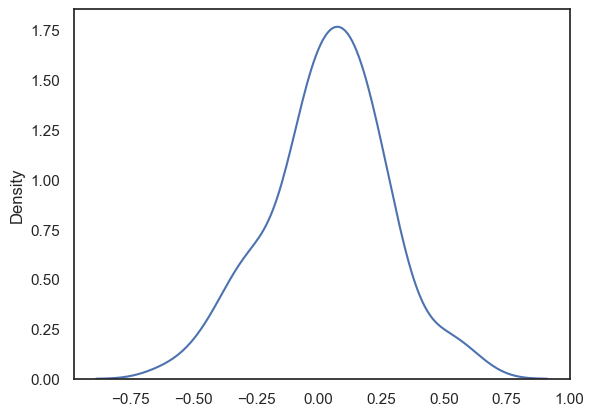

In [4]:
# (b)
eps = np.random.normal(loc=0, scale=0.25, size=100)
sns.kdeplot(eps)

In [9]:
# (c)
y = -1 + 0.5*x + eps
print(f"lenth of y = {len(y)}")

lenth of y = 100


- $\beta_0 = -1$, $\beta_1 = 0.5$

<Axes: xlabel='x', ylabel='y'>

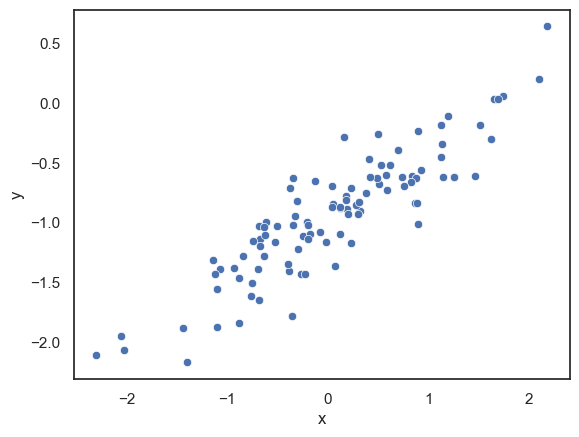

In [10]:
# (d)
df = pd.DataFrame(data={'x':x,'y':y})
sns.scatterplot(x='x', y='y', data=df)

In [13]:
# (e)
model_string = 'y ~ x'
model = smf.ols(formula=model_string, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           5.39e-36
Time:                        10:51:40   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

- True slope 0.5 is close to 0.5293 and intercept -0.96 very close to true of -1

In [16]:
results.params

Intercept   -0.963247
x            0.523857
dtype: float64

Text(0.5, 1.0, 'OLS Fit of Simulated Data')

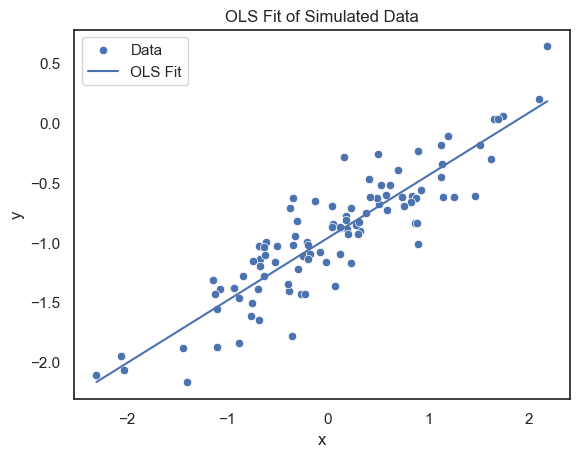

In [23]:
# (f) Plot scatter with graph
xs = np.linspace(df['x'].min(), df['x'].max(), 100)
ys = results.params['Intercept'] + results.params['x']*xs
sns.scatterplot(data=df, x='x', y='y', label='Data')
sns.lineplot(x=xs, y=ys, label='OLS Fit')
plt.legend()
plt.title("OLS Fit of Simulated Data")

In [24]:
# (g) Reproduce with x^2 term
model_string = 'y ~ x + I(x**2)'
model = smf.ols(formula=model_string, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.32e-34
Time:                        22:56:20   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.0

- Note in the above that the p-value for the x^2 term is large, suggesting there isn't enough evidence (via a t-test) to reject the null hypothesis that this coef is zero.

In [ ]:
# (h) Experimenting with Errors


## Problem 14 - Collinearity

In [45]:
rng = np.random.default_rng(5)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Text(0, 0.5, 'x2')

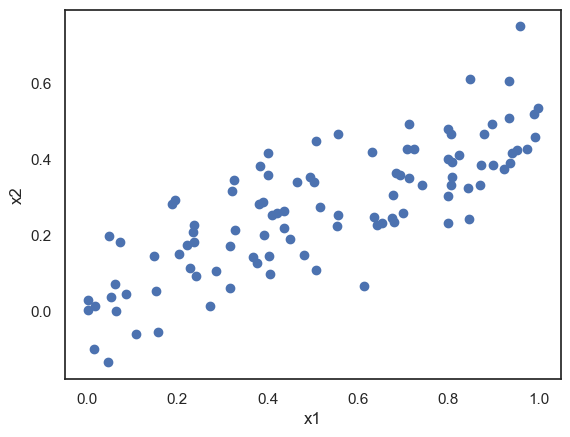

In [46]:
# (b) Plotting
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')

In [47]:
# Print out correlations between features
np.corrcoef(x1, x2)

array([[1.        , 0.79861815],
       [0.79861815, 1.        ]])

In [48]:
# (c) OLS fit
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
model_string = 'y ~ x1 + x2'
model = smf.ols(formula=model_string, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     23.89
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           3.68e-09
Time:                        10:04:37   Log-Likelihood:                -136.91
No. Observations:                 100   AIC:                             279.8
Df Residuals:                      97   BIC:                             287.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9414      0.199      9.768      0.0

(c) 
- Estimated --> $\hat{\beta}_0$ = 1.94, $\hat{\beta}_1$ = 2.09, $\hat{\beta}_2$ = 0.37

- True --> $\beta_0$ = 2, $\beta_1$ = 2, $\beta_2$ = 0.3

- Coefficients are pretty good! However, t and p value for x2 suggest can't reject null hypothesis that it is non-zero.

In [49]:
# (d) Only regress on x1
model_string = 'y ~ x1'
model = smf.ols(formula=model_string, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     48.05
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           4.45e-10
Time:                        10:15:02   Log-Likelihood:                -136.98
No. Observations:                 100   AIC:                             278.0
Df Residuals:                      98   BIC:                             283.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9544      0.195     10.028      0.0

- Regress on x1 only gets slightly higher F-stat and lower p-value. Yes, we can reject the null hypothesis that coefficient is 0.

In [50]:
model_string = 'y ~ x2'
model = smf.ols(formula=model_string, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.88
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           5.22e-07
Time:                        10:16:21   Log-Likelihood:                -144.02
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2301      0.197     11.343      0.0

- Regressing only on x2 we also can reject null hypotehesis given that we have small p and relatively large t stat. F-stat and p-value all worse though.

(f)
- These don't contradict each other. x2 depends on x1 and so should still be significant!
- x1 already explains much of the variation in y, so when in a model with x2, x2 becomes not significant. However, by themselves, both can explain variation in y (roughtly 30% or so)

Text(0.1, 0.8, 'new')

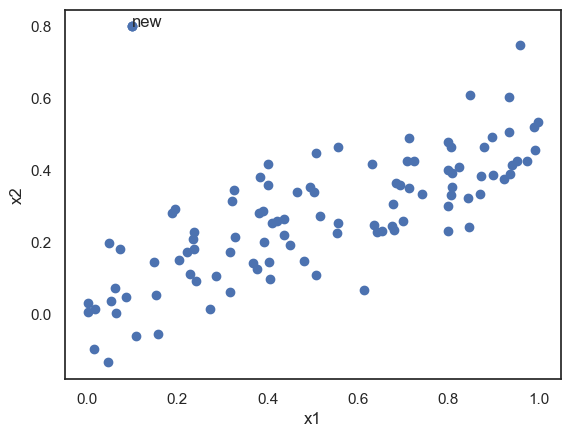

In [53]:
# (g)
x1 = np.concatenate([x1, [0.1]]) 
x2 = np.concatenate([x2, [0.8]]) 
y = np.concatenate([y, [6]])
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.annotate('new', (0.1, 0.8))

Text(0, 0.5, 'x2')

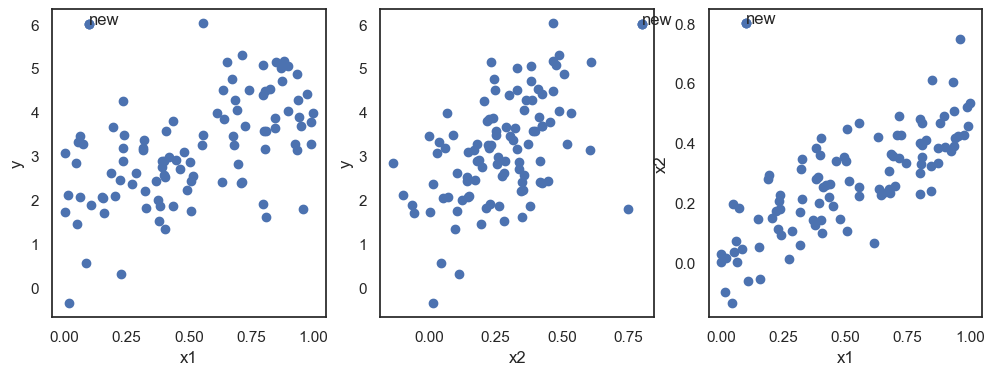

In [69]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].scatter(x1,y)
axes[0].annotate('new', (0.1,6))
axes[0].set_xlabel('x1')
axes[0].set_ylabel('y')
axes[1].scatter(x2,y)
axes[1].annotate('new', (0.8,6))
axes[1].set_xlabel('x2')
axes[1].set_ylabel('y')
axes[2].scatter(x1,x2)
axes[2].annotate('new', (0.1,0.8))
axes[2].set_xlabel('x1')
axes[2].set_ylabel('x2')

In [75]:
df = pd.DataFrame({'x1':x1, 'x2': x2, 'y': y})
new = smf.ols('y ~ x1 + x2', data=df)
results = new.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     25.87
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           8.80e-10
Time:                        10:45:11   Log-Likelihood:                -147.06
No. Observations:                 103   AIC:                             300.1
Df Residuals:                     100   BIC:                             308.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9795      0.210      9.407      0.0

- New point seems to be outlier plotting y against x1. Doesn't seem too crazy for x2. Has strange effect of making x2 significant and x1 not signficant. Overall model still significant with r^2 of 0.341.